In [99]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm


def data_import(folder_path: str) -> pd.DataFrame:
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    final_df = None

    if len(csv_files) == 0:
        print("Files not found.")
    else:

        df_list = []
        for arquivo in csv_files:
            file_path = os.path.join(folder_path, arquivo)
            df = pd.read_csv(file_path, sep=',')
            df_cleaned = df.dropna()
            df_cleaned = df_cleaned[df_cleaned['Order Date'] != 'Order Date']
            df_list.append(df_cleaned)

        final_df = pd.concat(df_list, ignore_index=False).drop(columns=['Unnamed: 0'])

    final_df.to_csv('data/output/sales.csv')
    return final_df

path = 'data/sales'
df = data_import(path)


In [100]:
df['Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
# df.set_index('Date', inplace=True)
df

df = df.groupby([df['Date'].dt.date, 'Product']).agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'}).reset_index()
df = df.rename(columns={'Order Date': 'Date', 'Quantity Ordered': 'Total Quantity', 'Price Each': 'Average Price'})


,Date,Product,Total Quantity,Average Price
0,2019-01-01,20in Monitor,4,109.99
1,2019-01-01,27in 4K Gaming Monitor,7,389.99
2,2019-01-01,27in FHD Monitor,8,149.99
3,2019-01-01,34in Ultrawide Monitor,18,379.99
4,2019-01-01,AA Batteries (4-pack),33,3.84
...,...,...,...,...
6822,2020-01-01,ThinkPad Laptop,2,999.99
6823,2020-01-01,USB-C Charging Cable,4,11.95
6824,2020-01-01,Vareebadd Phone,1,400.00
6825,2020-01-01,Wired Headphones,4,11.99


In [101]:
list_of_products = df['Product'].unique()
print(list_of_products)

usb_c_charging_cable = df[df['Product'] == 'USB-C Charging Cable']
bose_soundsport_headphone = df[df['Product'] == 'Bose SoundSport Headphones']
google_phone = df[df['Product'] == 'Google Phone']
wired_headphones = df[df['Product'] == 'Wired Headphones']
macbook = df[df['Product'] == 'Macbook Pro Laptop']
lighting_charge_cable = df[df['Product'] == 'Lightning Charging Cable']
gaming_monitor = df[df['Product'] == '27in 4K Gaming Monitor']
aa_batteries = df[df['Product'] == 'AA Batteries (4-pack)']
apple_airpods = df[df['Product'] == 'Apple Airpods Headphones']
aaa_batteries = df[df['Product'] == 'AAA Batteries (4-pack)']
iphone = df[df['Product'] == 'iPhone']
flatscreen_tv = df[df['Product'] == 'Flatscreen TV']
twentysevenin_fhd_monitor = df[df['Product'] == '27in FHD Monitor']
twentyin_monitor = df[df['Product'] == '20in Monitor']
lg_dryer = df[df['Product'] == 'LG Dryer']
thinkpad_laptop = df[df['Product'] == 'ThinkPad Laptop']
vareebadd_phone = df[df['Product'] == 'Vareebadd Phone']
lg_washing_machine = df[df['Product'] == 'LG Washing Machine']
thirtyfourin_ultrawide_monitor = df[df['Product'] == '34in Ultrawide Monitor']

product_df_list = [
    usb_c_charging_cable, bose_soundsport_headphone, google_phone, wired_headphones, macbook, lighting_charge_cable, gaming_monitor,
    aa_batteries, apple_airpods, aaa_batteries, iphone, flatscreen_tv, twentysevenin_fhd_monitor, twentyin_monitor, lg_dryer,
    thinkpad_laptop, vareebadd_phone, lg_washing_machine, thirtyfourin_ultrawide_monitor
]

['20in Monitor' '27in 4K Gaming Monitor' '27in FHD Monitor'
 '34in Ultrawide Monitor' 'AA Batteries (4-pack)' 'AAA Batteries (4-pack)'
 'Apple Airpods Headphones' 'Bose SoundSport Headphones' 'Flatscreen TV'
 'Google Phone' 'LG Dryer' 'LG Washing Machine' 'Lightning Charging Cable'
 'Macbook Pro Laptop' 'ThinkPad Laptop' 'USB-C Charging Cable'
 'Vareebadd Phone' 'Wired Headphones' 'iPhone']


In [102]:
# total price per day
for product_df in product_df_list:
    product_df['Total Sold'] = product_df['Total Quantity'] * product_df['Average Price']

C:\Users\klaud\AppData\Local\Temp\ipykernel_3452\1774561509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Total Sold'] = product_df['Total Quantity'] * product_df['Average Price']
C:\Users\klaud\AppData\Local\Temp\ipykernel_3452\1774561509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Total Sold'] = product_df['Total Quantity'] * product_df['Average Price']
C:\Users\klaud\AppData\Local\Temp\ipykernel_3452\1774561509.py:3: SettingWithCopyWarning: 
A value is trying to be s

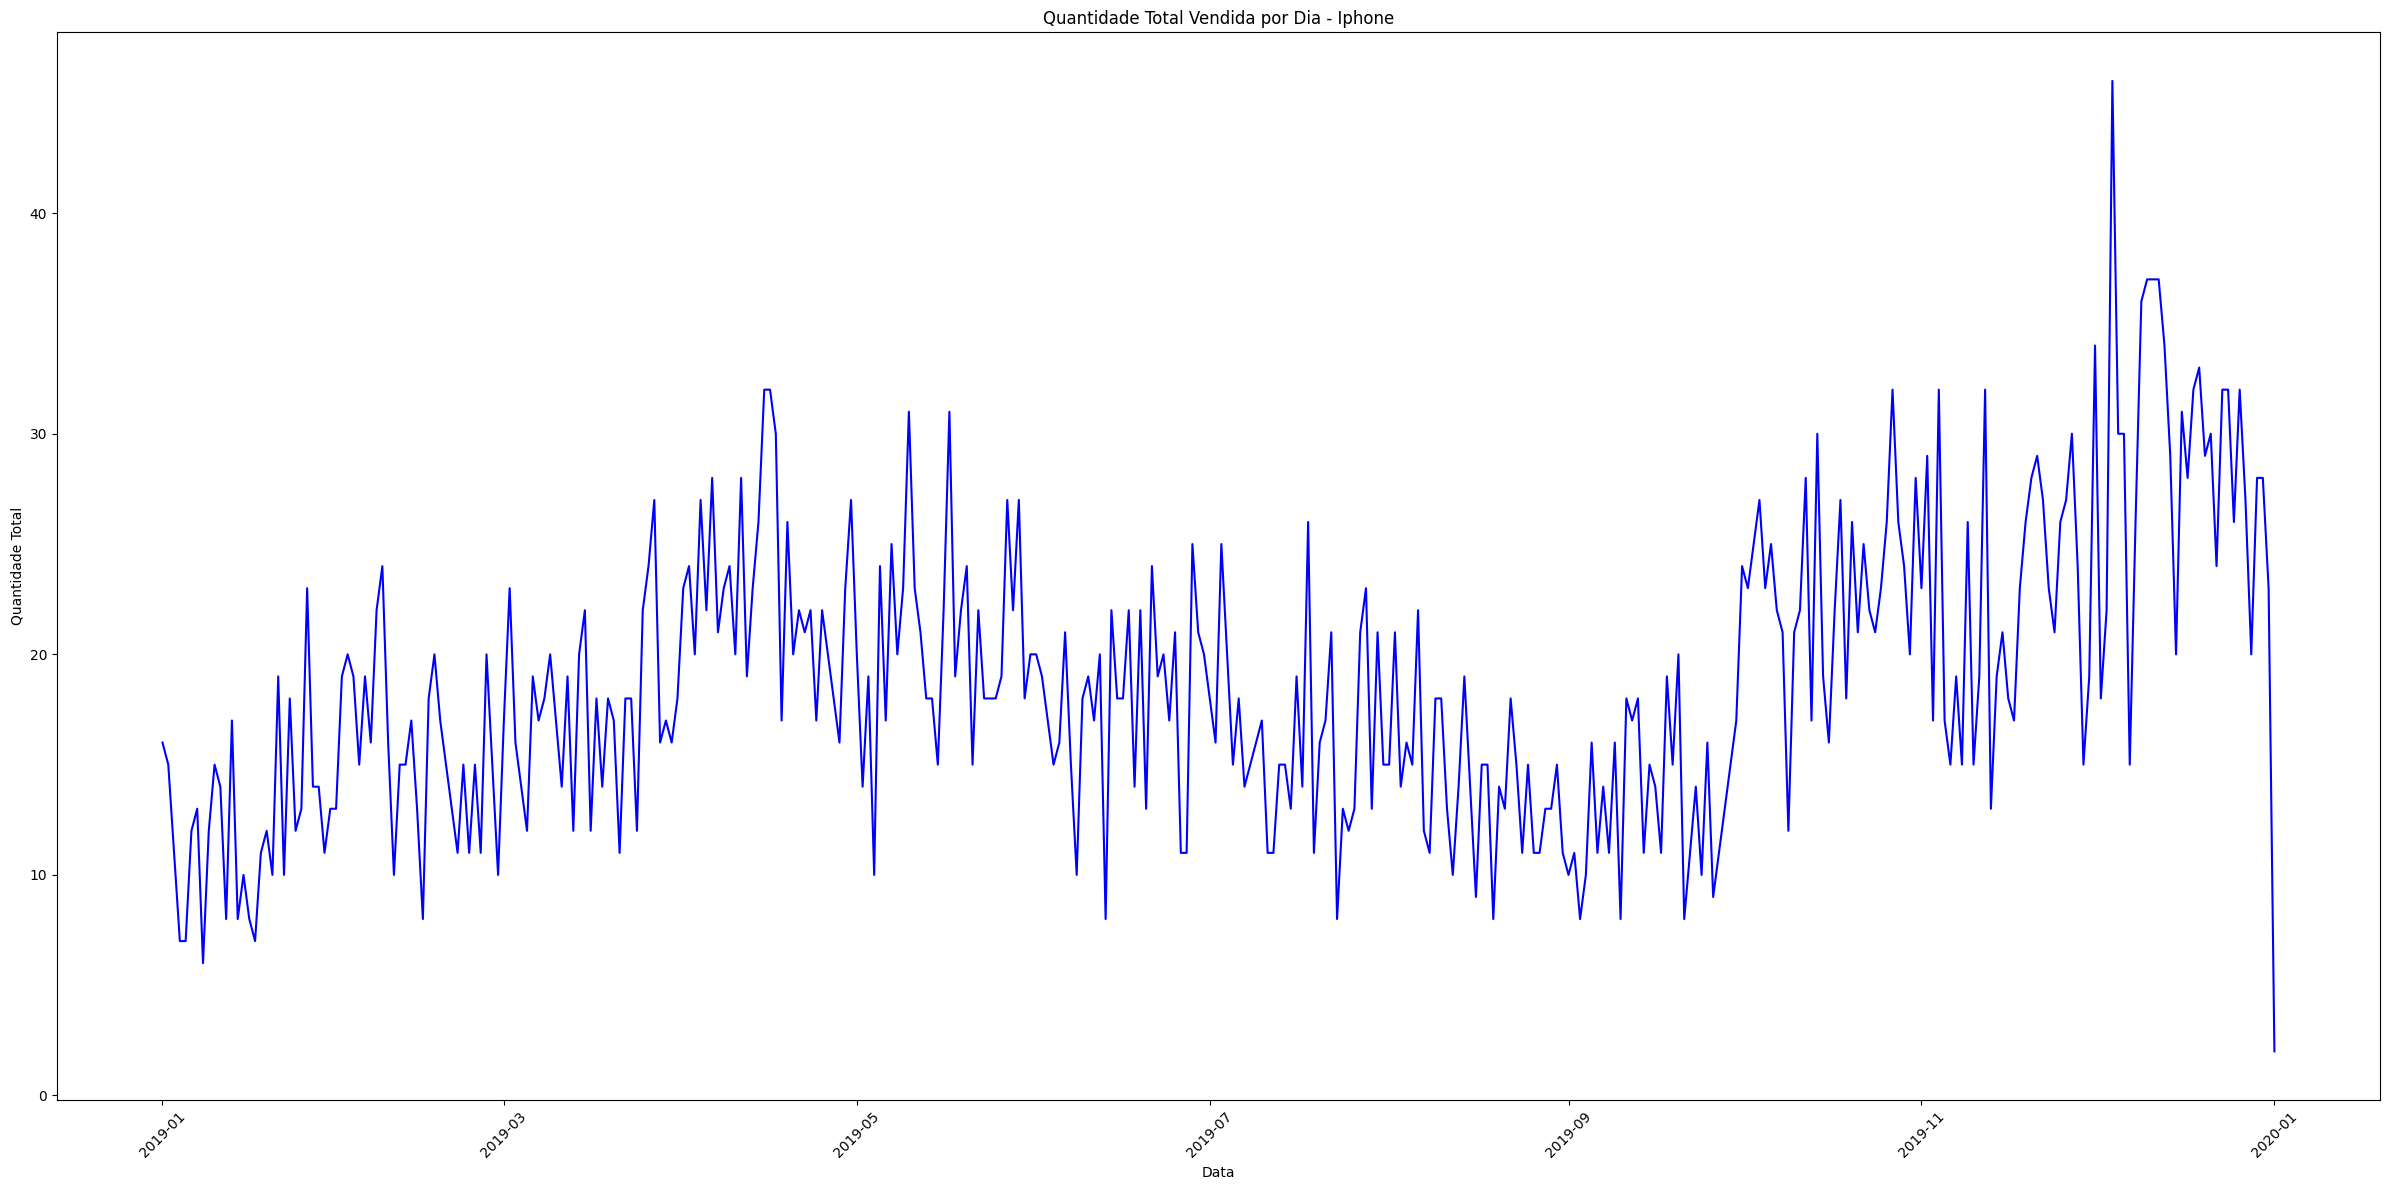

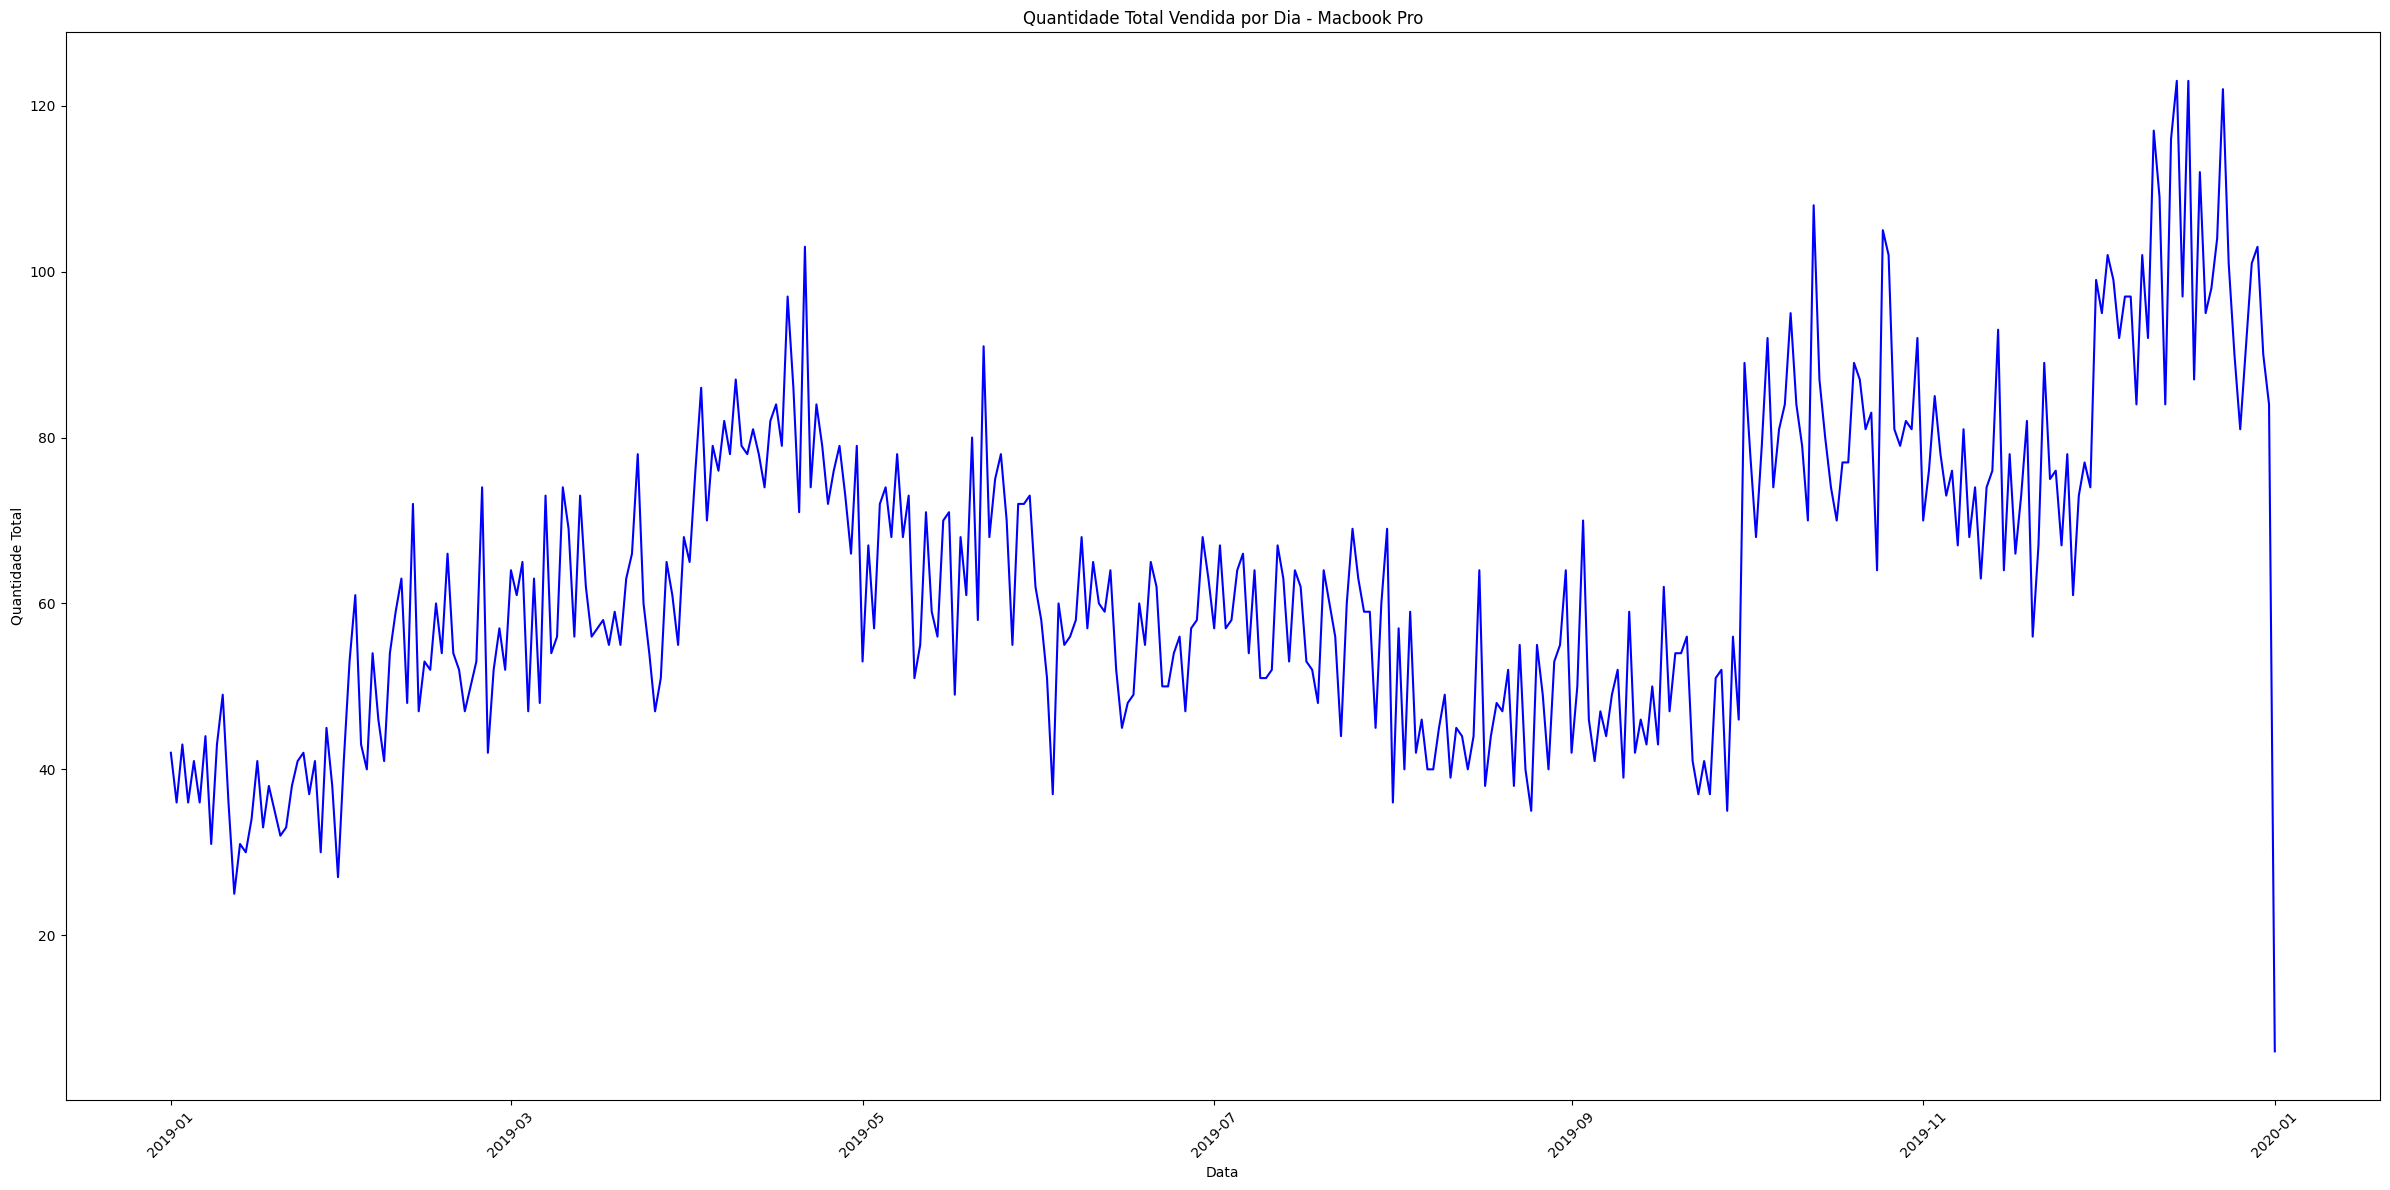

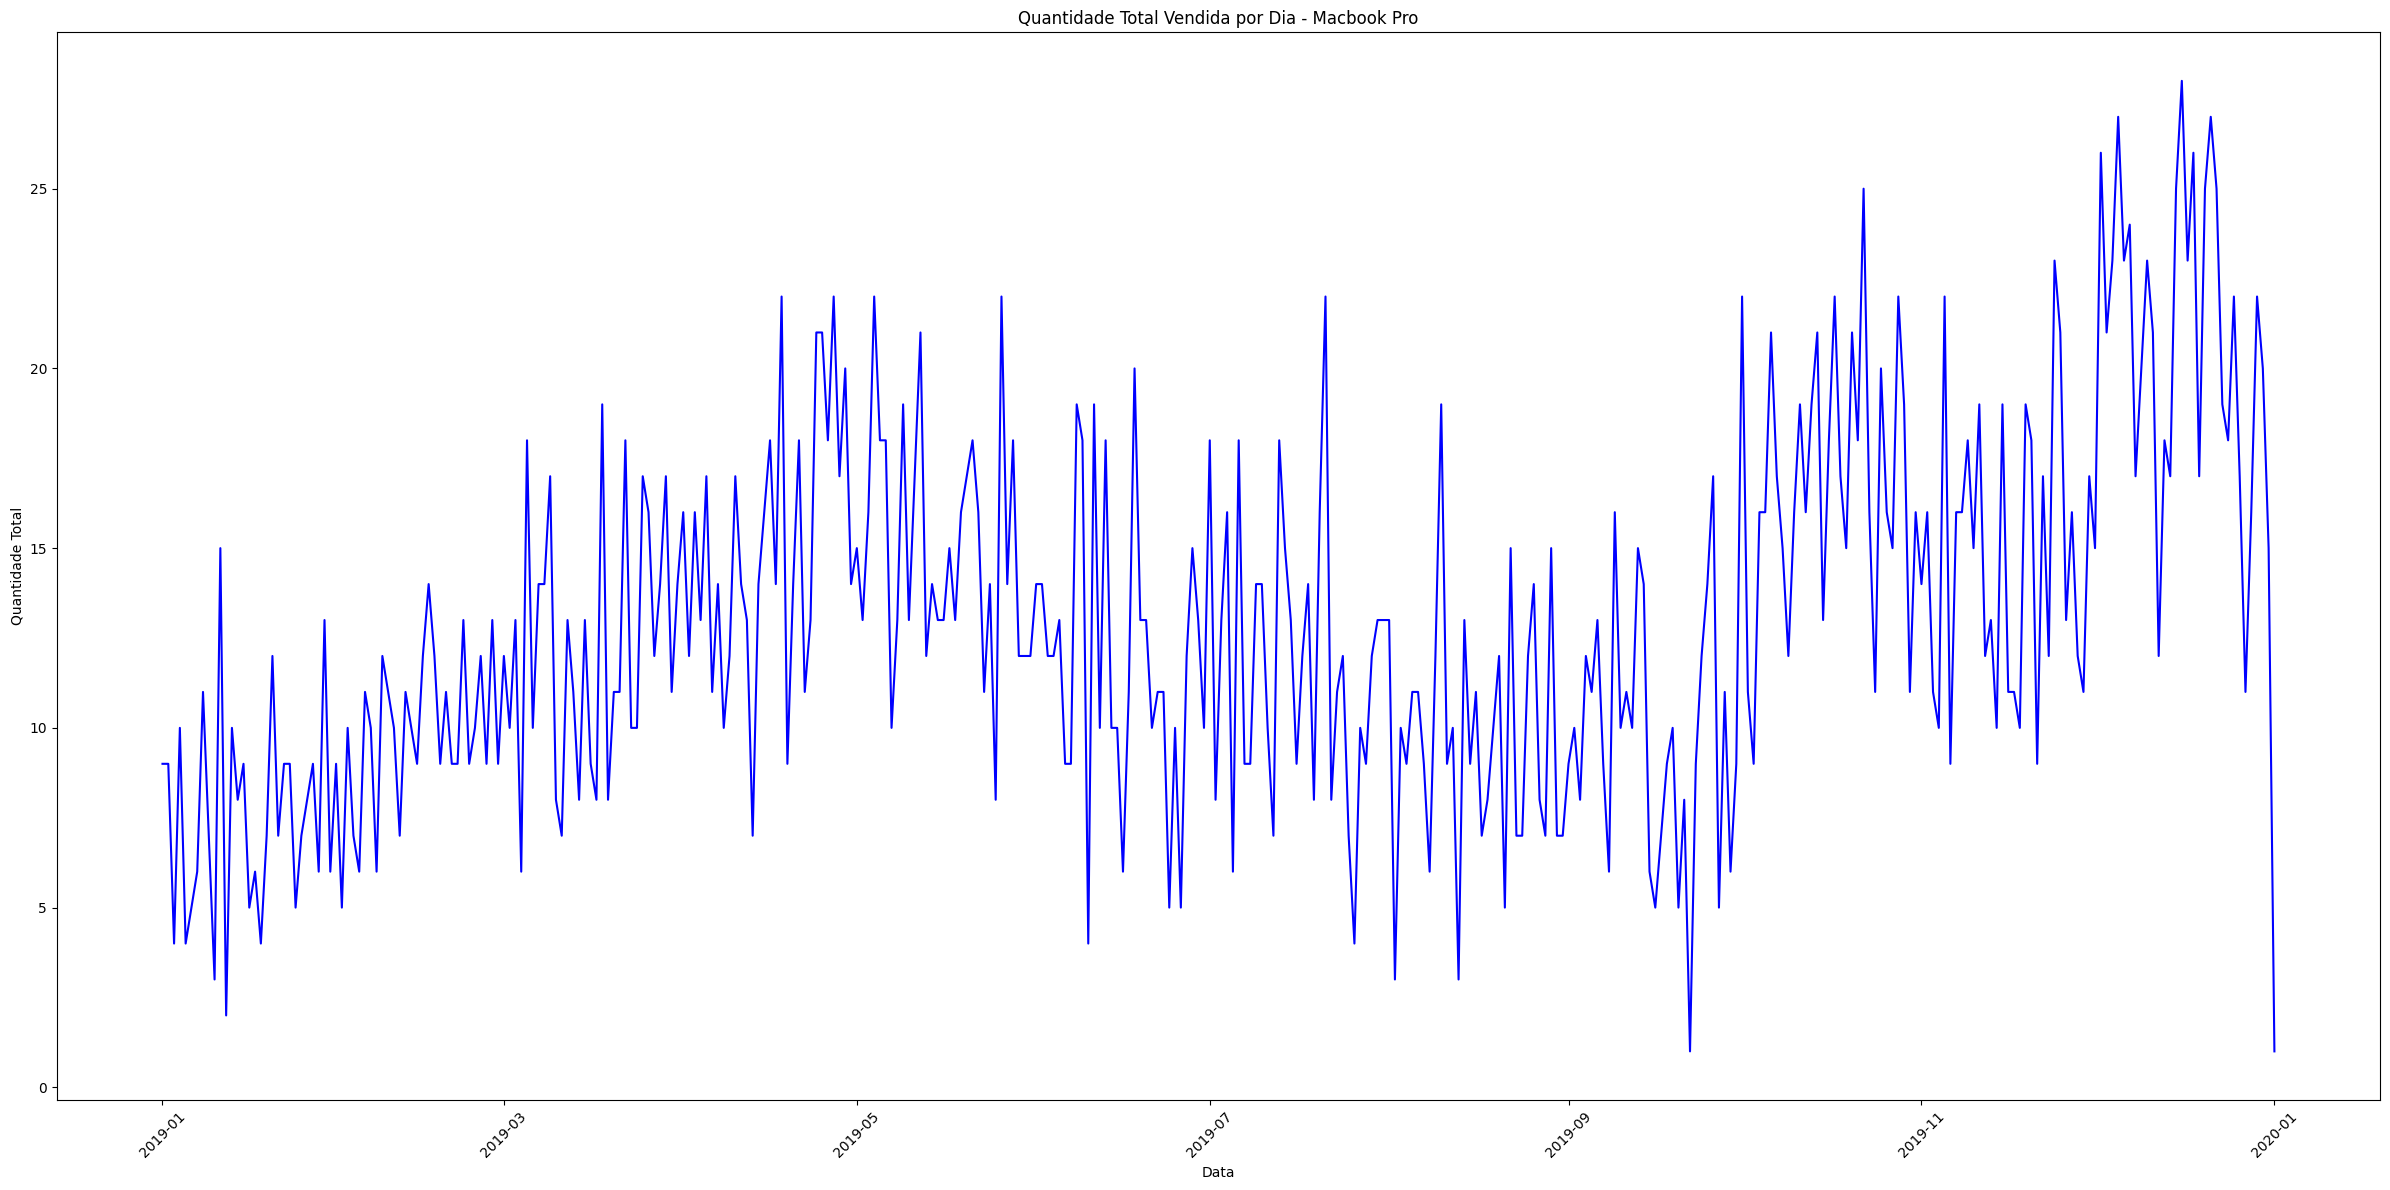

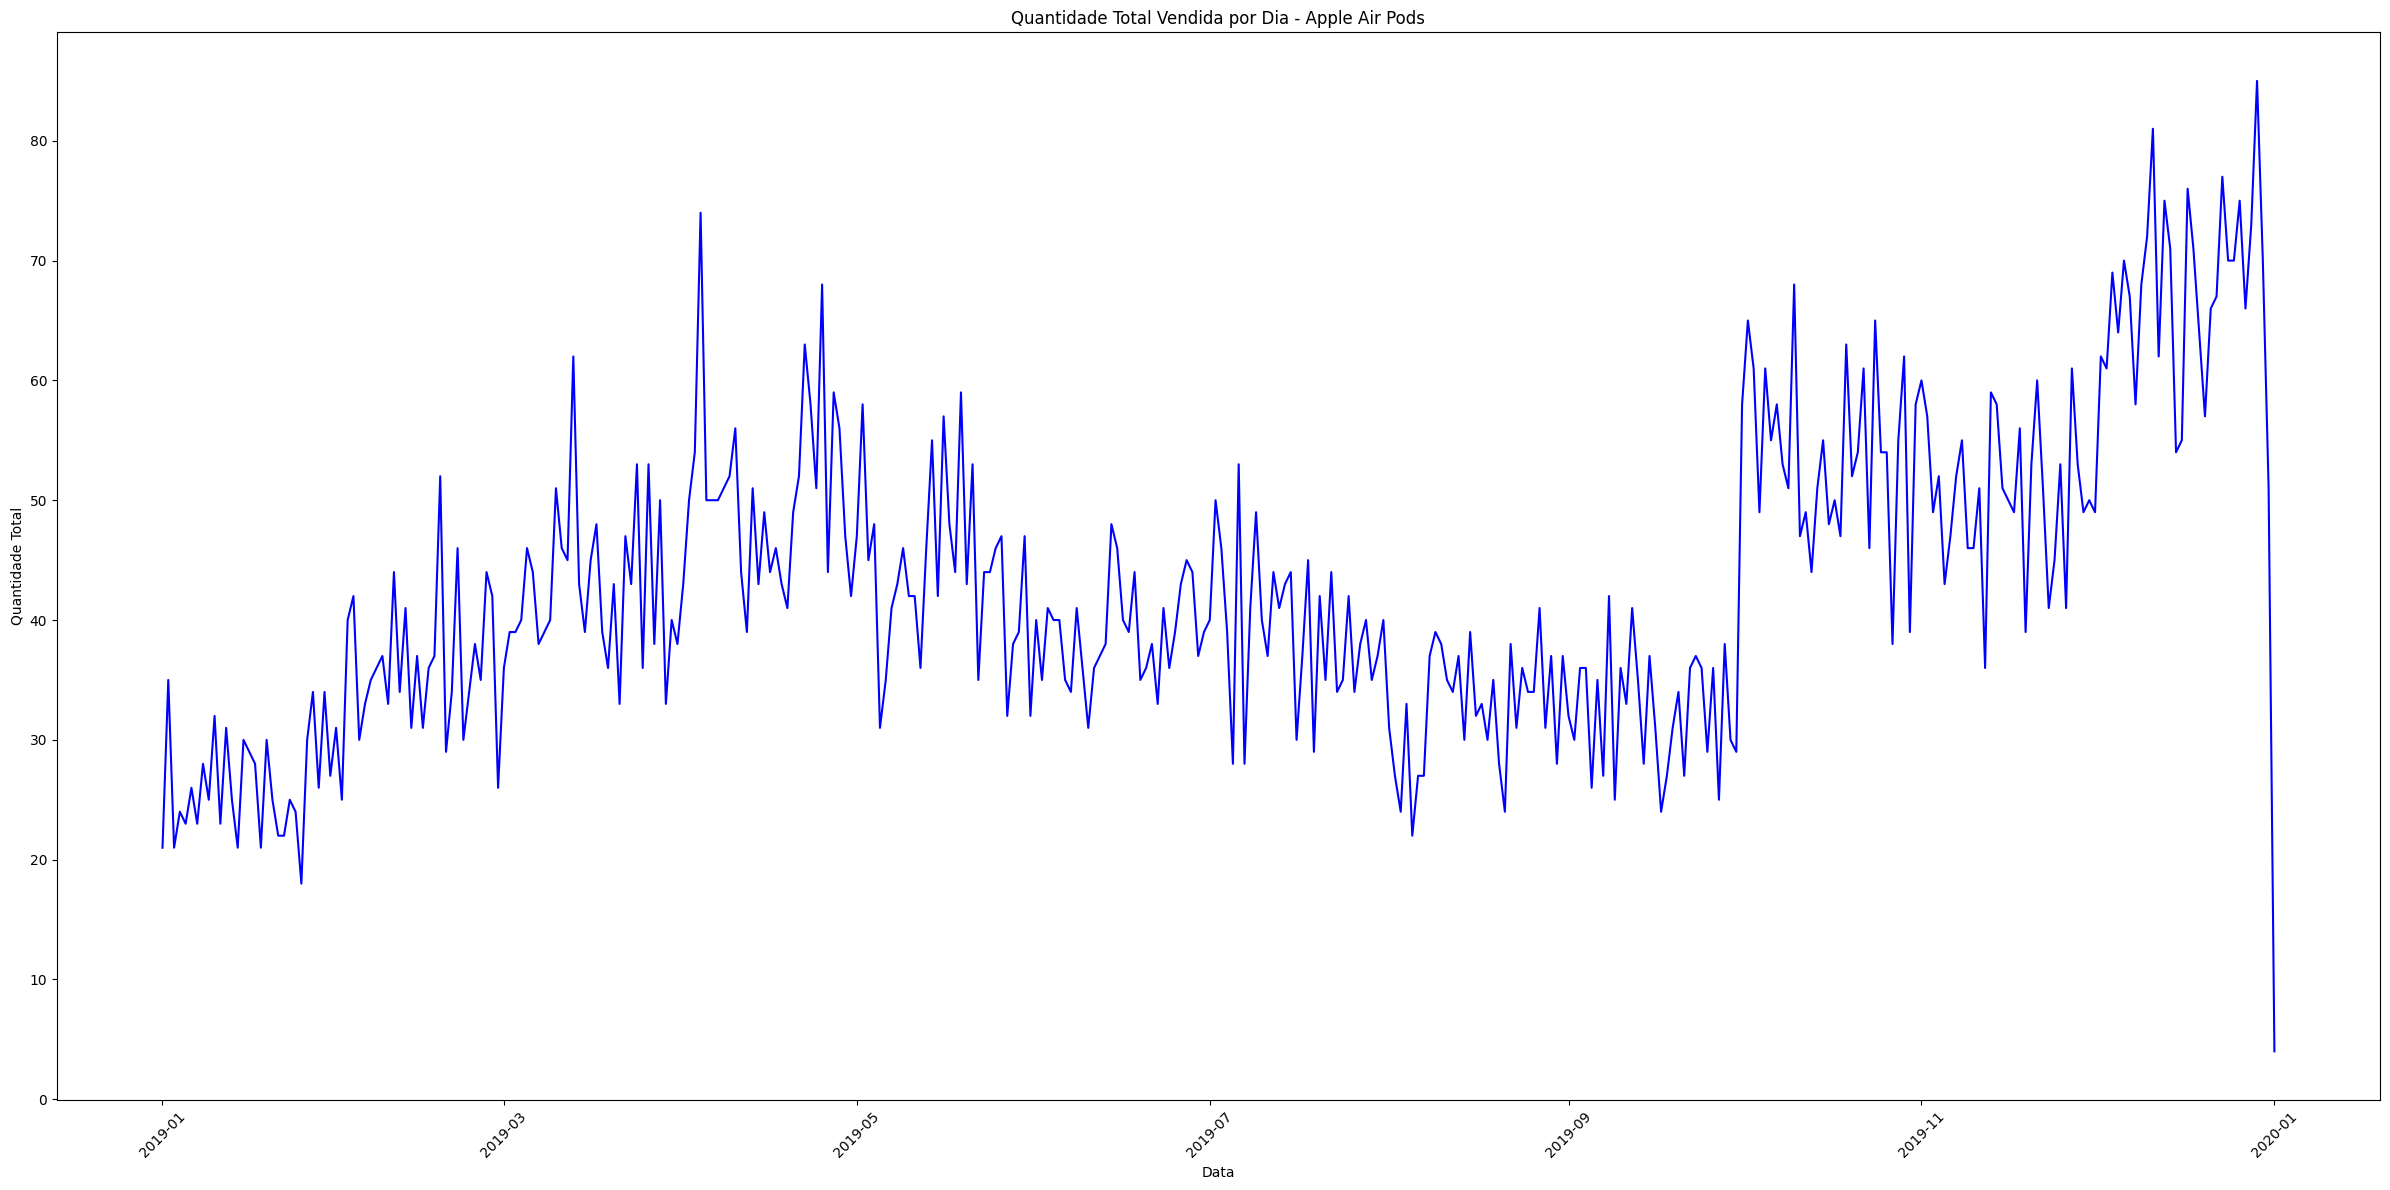

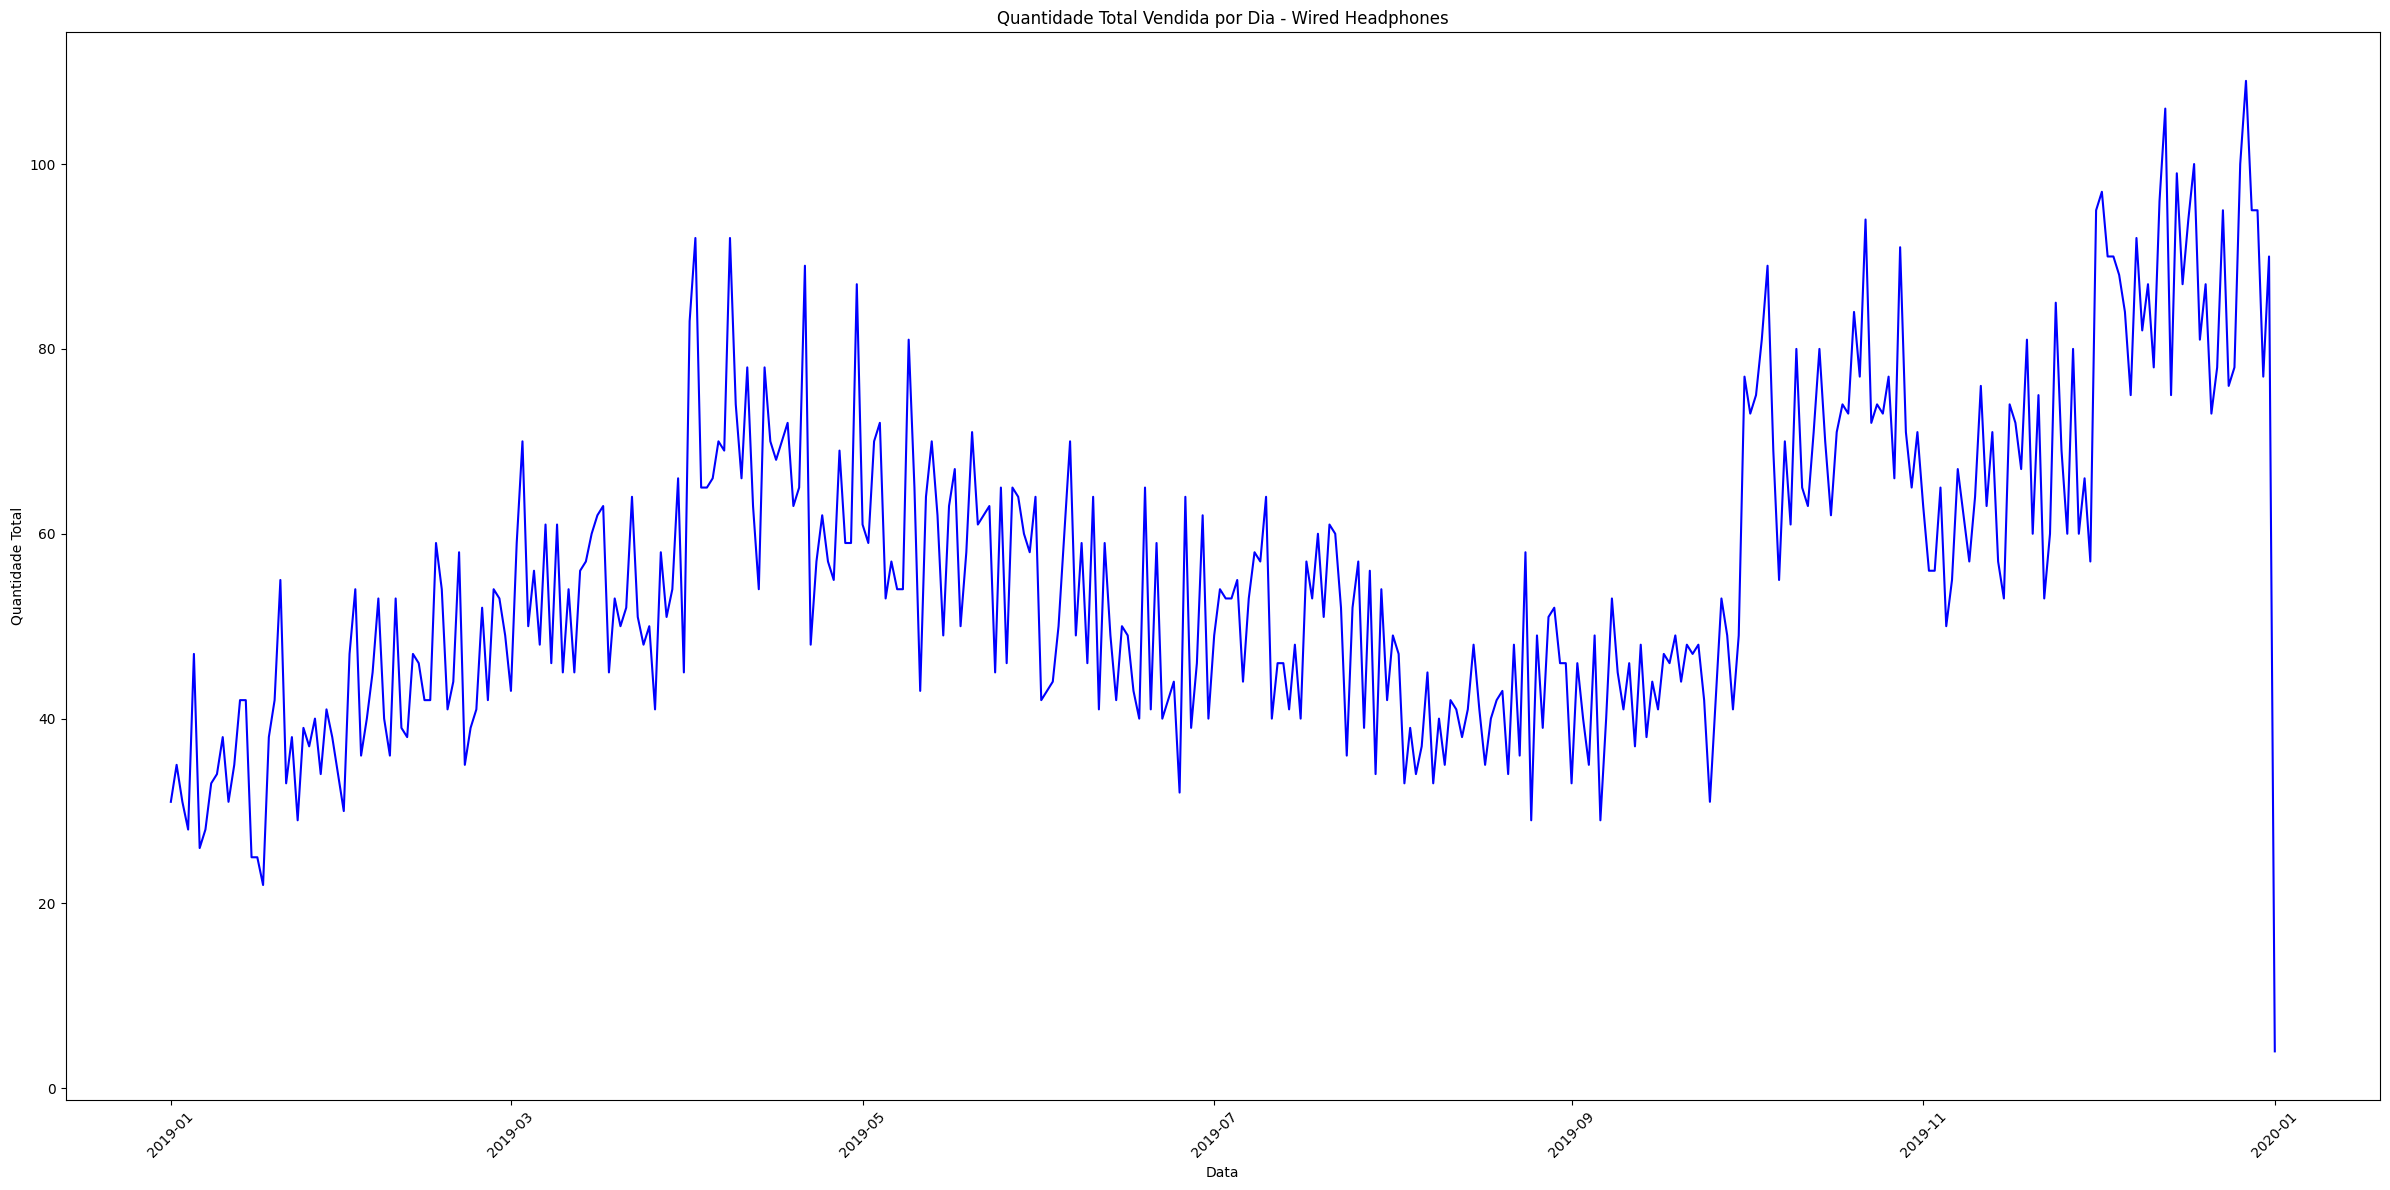

In [130]:
# plot time series 
# Interested products: Iphone, Lightning Charge Cable, Macbook Pro, Apple Air Pods and Wired Headphones (new product)

plt.figure(0, figsize=(24, 12))
plt.plot(iphone['Date'], iphone['Total Quantity'], linestyle='-', color='b')
# Personalize o gráfico
plt.title(f'Quantidade Total Vendida por Dia - Iphone')
plt.xlabel('Data')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.savefig(f'images/iphone.png', format='png', dpi=300, bbox_inches='tight')

# Exiba o gráfico
plt.tight_layout()
plt.show()

plt.figure(1, figsize=(24, 12))
plt.plot(lighting_charge_cable['Date'], lighting_charge_cable['Total Quantity'], linestyle='-', color='b')
# Personalize o gráfico
plt.title(f'Quantidade Total Vendida por Dia - Macbook Pro')
plt.xlabel('Data')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.savefig(f'images/lighting_charge_cable.png', format='png', dpi=300, bbox_inches='tight')

# Exiba o gráfico
plt.tight_layout()
plt.show()

plt.figure(2, figsize=(24, 12))
plt.plot(macbook['Date'], macbook['Total Quantity'], linestyle='-', color='b')
# Personalize o gráfico
plt.title(f'Quantidade Total Vendida por Dia - Macbook Pro')
plt.xlabel('Data')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.savefig(f'images/macbook.png', format='png', dpi=300, bbox_inches='tight')

# Exiba o gráfico
plt.tight_layout()
plt.show()


plt.figure(3, figsize=(24, 12))
plt.plot(apple_airpods['Date'], apple_airpods['Total Quantity'], linestyle='-', color='b')
# Personalize o gráfico
plt.title(f'Quantidade Total Vendida por Dia - Apple Air Pods')
plt.xlabel('Data')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.savefig(f'images/apple_airpods.png', format='png', dpi=300, bbox_inches='tight')

# Exiba o gráfico
plt.tight_layout()
plt.show()


plt.figure(4, figsize=(24, 12))
plt.plot(wired_headphones['Date'], wired_headphones['Total Quantity'], linestyle='-', color='b')
# Personalize o gráfico
plt.title(f'Quantidade Total Vendida por Dia - Wired Headphones')
plt.xlabel('Data')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.savefig(f'images/wired_headphones.png', format='png', dpi=300, bbox_inches='tight')

# Exiba o gráfico
plt.tight_layout()
plt.show()



In [125]:
# for product_df in product_df_list:
#     index = product_df_list.index(product_df)
#     plt.figure(index+1, figsize=(24, 12))
#     product_name = list_of_products[index]
#     plt.plot(iphone['Date'], product_df['Total Quantity'], linestyle='-', color='b')
#     # Personalize o gráfico
#     plt.title(f'Quantidade Total Vendida por Dia - {product_name}')
#     plt.xlabel('Data')
#     plt.ylabel('Quantidade Total')
#     plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
#     plt.savefig(f'images/{product_name.replace(" ", "_").replace("-","_").lower()}.png', format='png', dpi=300, bbox_inches='tight')

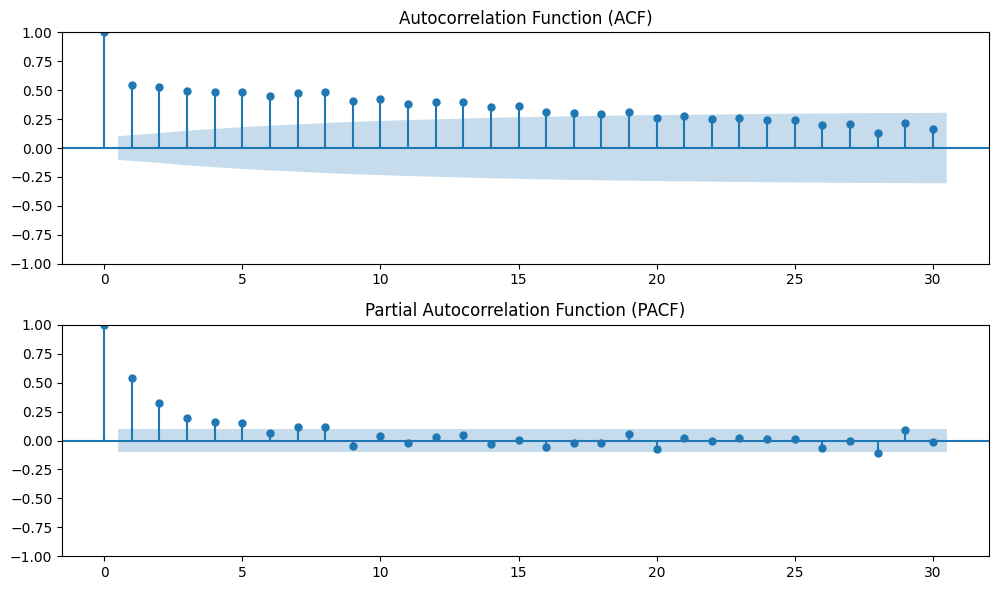

In [132]:
# AUTO CORRELAÇÃO E CORRELAÇÃO PARCIAL
import statsmodels.api as sm

# Use autocorrelation and partial autocorrelation plots to estimate the orders of the ARIMA model (p, d, q). 

# plot ACF e PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Calcular e plotar a ACF
sm.graphics.tsa.plot_acf(iphone['Total Quantity'], lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Calcular e plotar a PACF
sm.graphics.tsa.plot_pacf(iphone['Total Quantity'], lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [137]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

p, d, q = 1, 1, 1  # Replace with your determined values

model = ARIMA(iphone['Total Quantity'], order=(p, d, q))
results = model.fit()

print(results.summary())
forecast_steps = 10  # Number of forecasted time steps
forecast, stderr, conf_int = results.forecast(steps=forecast_steps)

# Plot the observed data, fitted values, and forecasts with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(iphone['Total Quantity'], label='Observed Data')
plt.plot(np.arange(len(iphone['Total Quantity']), len(iphone['Total Quantity']) + forecast_steps), forecast, label='Forecast', color='red')
plt.fill_between(np.arange(len(iphone['Total Quantity']), len(iphone['Total Quantity']) + forecast_steps), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


                               SARIMAX Results                                
Dep. Variable:         Total Quantity   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1099.944
Date:                Wed, 27 Sep 2023   AIC                           2205.889
Time:                        07:21:17   BIC                           2217.588
Sample:                             0   HQIC                          2210.538
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0329      0.070      0.467      0.641      -0.105       0.171
ma.L1         -0.8267      0.037    -22.339      0.000      -0.899      -0.754
sigma2        24.1965      1.254     19.291      0.0

c:\Users\klaud\OneDrive\Documentos\sales-data-forecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\klaud\OneDrive\Documentos\sales-data-forecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\klaud\OneDrive\Documentos\sales-data-forecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\klaud\OneDrive\Documentos\sales-data-forecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

ValueError: too many values to unpack (expected 3)